In [1]:
import akshare as ak
import pandas as pd
import numpy as np

In [2]:
WATCH_CODES = [("东方财富", 300059), ("中国人保", 601319), ("汇川技术", 300124), ("贵州茅台", 600519), ("捷昌驱动", 603583)]

In [3]:
stock_pinan = ak.stock_zh_a_hist(symbol="300059", period="daily", start_date="20200301", end_date='20250103', adjust="")["收盘"]

<Axes: >

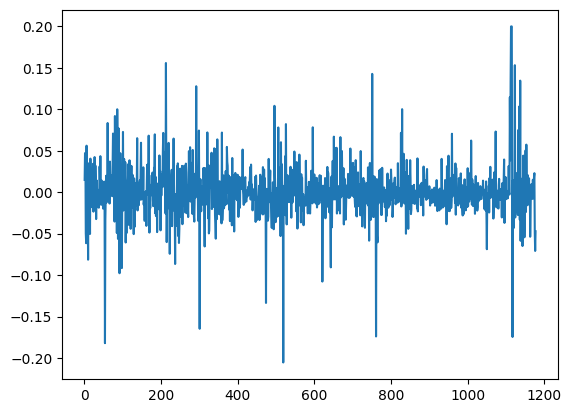

In [4]:
(stock_pinan/stock_pinan.shift(1)-1).plot()

<Axes: >

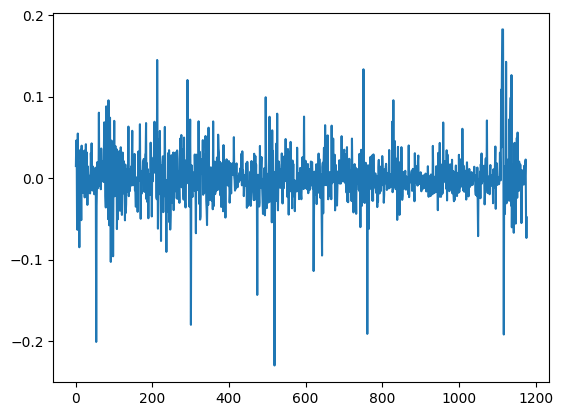

In [5]:
np.log(stock_pinan/stock_pinan.shift(1)).plot()

In [6]:
stock_pinan = stock_pinan.fillna(method="ffill")
(stock_pinan[7]/stock_pinan[0]-1)**(1/7)

C:\Users\51560\AppData\Local\Temp\ipykernel_10300\413663215.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_pinan = stock_pinan.fillna(method="ffill")
C:\Users\51560\AppData\Local\Temp\ipykernel_10300\413663215.py:2: RuntimeWarning: invalid value encountered in scalar power
  (stock_pinan[7]/stock_pinan[0]-1)**(1/7)


np.float64(nan)

In [7]:
(stock_pinan[7]/stock_pinan[0])

np.float64(0.9994499449944996)

In [8]:
stock_pinan[0:7]

0    18.18
1    18.45
2    19.32
3    20.17
4    19.17
5    17.99
6    19.00
Name: 收盘, dtype: float64

In [9]:
(stock_pinan[7]/stock_pinan[0])**(1/7)-1

np.float64(-7.859781692298728e-05)

In [10]:
((stock_pinan[7]/stock_pinan[0])**(1/7)-1)*244

np.float64(-0.019177867329208897)

<Axes: >

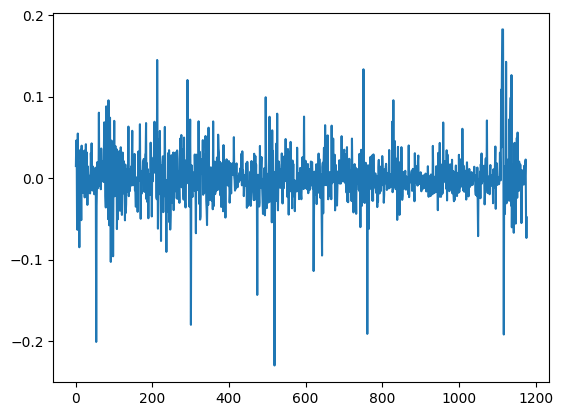

In [11]:
np.log(stock_pinan/stock_pinan.shift(1)).plot()

<Axes: >

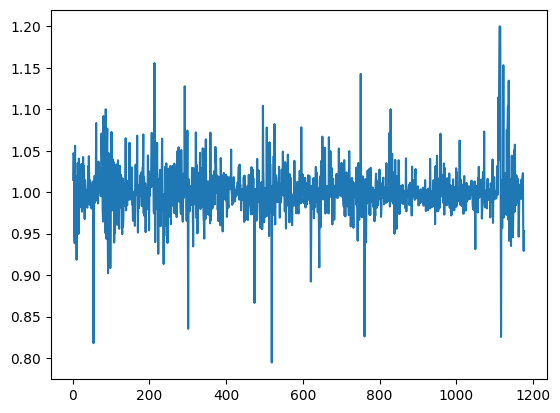

In [12]:
(stock_pinan/stock_pinan.shift(1)).plot()

In [13]:
WATCH_CODES

[('东方财富', 300059),
 ('中国人保', 601319),
 ('汇川技术', 300124),
 ('贵州茅台', 600519),
 ('捷昌驱动', 603583)]

In [14]:
p = ak.stock_zh_a_hist("300059", period="daily", start_date="20200301", end_date='20241231', adjust="hfq")
p.set_index("日期", inplace=True)
p

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2020-03-02,300059,673.90,688.58,702.87,661.87,4604523,8.301296e+09,6.24,4.75,31.23,8.45
2020-03-03,300059,708.14,698.74,732.60,689.33,4298307,8.048508e+09,6.28,1.48,10.16,7.89
2020-03-04,300059,697.98,731.47,731.47,688.95,4199615,7.863390e+09,6.09,4.68,32.73,7.71
2020-03-05,300059,737.11,763.45,782.64,717.17,6029906,1.192476e+10,8.95,4.37,31.98,11.07
2020-03-06,300059,742.00,725.83,750.66,725.45,3577783,6.953360e+09,3.30,-4.93,-37.62,6.57
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,300059,2074.59,2056.64,2077.71,2036.36,3210913,8.379227e+09,2.00,-0.72,-14.83,2.40
2024-12-26,300059,2055.86,2054.30,2069.13,2042.60,2826093,7.383461e+09,1.29,-0.11,-2.34,2.12
2024-12-27,300059,2055.08,2091.75,2140.90,2045.72,6766872,1.795790e+10,4.63,1.82,37.45,5.07


In [15]:
ps = p["收盘"]
ps

日期
2020-03-02     688.58
2020-03-03     698.74
2020-03-04     731.47
2020-03-05     763.45
2020-03-06     725.83
               ...   
2024-12-25    2056.64
2024-12-26    2054.30
2024-12-27    2091.75
2024-12-30    2139.34
2024-12-31    2034.80
Name: 收盘, Length: 1176, dtype: float64

In [16]:
for n,i in WATCH_CODES[1:]:
    p_i = ak.stock_zh_a_hist(str(i), period="daily", start_date="20200301", end_date='20241231', adjust="hfq")[["日期", "收盘"]]
    p_i.set_index("日期", inplace=True)
    ps = pd.concat([ps, p_i], axis=1)

ps.ffill(inplace=True)

In [17]:
ps

,收盘,收盘,收盘,收盘,收盘
日期,,,,,
2020-03-02,688.58,7.06,444.71,5759.89,71.89
2020-03-03,698.74,7.07,456.34,5895.51,73.09
2020-03-04,731.47,7.10,462.08,5975.51,72.60
2020-03-05,763.45,7.39,453.76,6186.95,73.89
2020-03-06,725.83,7.18,454.91,6109.07,72.54
...,...,...,...,...,...
2024-12-25,2056.64,8.48,1338.75,8893.70,76.23
2024-12-26,2054.30,8.45,1351.67,8882.59,77.71
2024-12-27,2091.75,8.47,1336.82,8888.52,78.87


In [18]:
ps.columns = [code[0] for code in WATCH_CODES]
ps

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-02,688.58,7.06,444.71,5759.89,71.89
2020-03-03,698.74,7.07,456.34,5895.51,73.09
2020-03-04,731.47,7.10,462.08,5975.51,72.60
2020-03-05,763.45,7.39,453.76,6186.95,73.89
2020-03-06,725.83,7.18,454.91,6109.07,72.54
...,...,...,...,...,...
2024-12-25,2056.64,8.48,1338.75,8893.70,76.23
2024-12-26,2054.30,8.45,1351.67,8882.59,77.71
2024-12-27,2091.75,8.47,1336.82,8888.52,78.87


In [19]:
(ps/ps.shift(1))-1

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-02,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.014755,0.001416,0.026152,0.023546,0.016692
2020-03-04,0.046841,0.004243,0.012578,0.013570,-0.006704
2020-03-05,0.043720,0.040845,-0.018006,0.035384,0.017769
2020-03-06,-0.049276,-0.028417,0.002534,-0.012588,-0.018270
...,...,...,...,...,...
2024-12-25,-0.007159,0.014354,0.002899,-0.004957,0.015182
2024-12-26,-0.001138,-0.003538,0.009651,-0.001249,0.019415
2024-12-27,0.018230,0.002367,-0.010986,0.000668,0.014927


In [20]:
r=((ps/ps.shift(1))-1).dropna()

In [21]:
r_log = np.log(ps/ps.shift(1)).dropna()

In [22]:
r

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-03,0.014755,0.001416,0.026152,0.023546,0.016692
2020-03-04,0.046841,0.004243,0.012578,0.013570,-0.006704
2020-03-05,0.043720,0.040845,-0.018006,0.035384,0.017769
2020-03-06,-0.049276,-0.028417,0.002534,-0.012588,-0.018270
2020-03-09,-0.061171,-0.033426,-0.036601,-0.034126,-0.076923
...,...,...,...,...,...
2024-12-25,-0.007159,0.014354,0.002899,-0.004957,0.015182
2024-12-26,-0.001138,-0.003538,0.009651,-0.001249,0.019415
2024-12-27,0.018230,0.002367,-0.010986,0.000668,0.014927


In [23]:
r_log

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-03,0.014647,0.001415,0.025816,0.023273,0.016554
2020-03-04,0.045777,0.004234,0.012500,0.013478,-0.006727
2020-03-05,0.042791,0.040033,-0.018170,0.034773,0.017613
2020-03-06,-0.050532,-0.028828,0.002531,-0.012668,-0.018439
2020-03-09,-0.063122,-0.033998,-0.037287,-0.034722,-0.080043
...,...,...,...,...,...
2024-12-25,-0.007185,0.014252,0.002895,-0.004970,0.015068
2024-12-26,-0.001138,-0.003544,0.009605,-0.001250,0.019229
2024-12-27,0.018066,0.002364,-0.011047,0.000667,0.014817


In [24]:
w1 = np.array([0.2,0.2,0.2,0.3,0.1])

In [25]:
r_n=np.dot(r,w1)

In [26]:
r_n

array([ 0.01719756,  0.0161331 ,  0.02570413, ...,  0.00361511,
        0.00771807, -0.02291288], shape=(1175,))

In [37]:
ps.head(1)

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-02,688.58,7.06,444.71,5759.89,71.89


In [38]:
ps.tail(1)

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2024-12-31,2034.8,8.42,1319.38,8863.55,74.61


In [41]:
(ps.tail(1).values/ps.head(1).values)-1

array([[1.95506695, 0.19263456, 1.96683232, 0.53884015, 0.03783558]])

In [42]:
np.dot(((ps.tail(1).values/ps.head(1).values)-1), w1)

array([0.98834237])

In [29]:
ps.tail() - ps.head()

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-02,NaN,NaN,NaN,NaN,NaN
2020-03-03,NaN,NaN,NaN,NaN,NaN
2020-03-04,NaN,NaN,NaN,NaN,NaN
2020-03-05,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN
2024-12-25,NaN,NaN,NaN,NaN,NaN
2024-12-26,NaN,NaN,NaN,NaN,NaN
2024-12-27,NaN,NaN,NaN,NaN,NaN
2024-12-30,NaN,NaN,NaN,NaN,NaN
